<a href="https://colab.research.google.com/github/patriciomontenegro/telecom_x/blob/main/challenge3_telecomx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracción de datos**

In [1]:
import pandas as pd

In [2]:
datos_telecomx = pd.read_json('TelecomX_Data.json')

In [3]:
datos_telecomx

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## **Conociendo el conjunto de datos**

In [4]:
datos_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
datos_telecomx.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


# **Normalizar el archivo json**

In [7]:
normalized_customer = pd.json_normalize(datos_telecomx['customer'])
normalized_phone = pd.json_normalize(datos_telecomx['phone'])
normalized_internet = pd.json_normalize(datos_telecomx['internet'])
normalized_account = pd.json_normalize(datos_telecomx['account'])

In [8]:
datos_telecomx = datos_telecomx.drop(columns=['customer', 'phone', 'internet', 'account'])

In [9]:
datos_telecomx = pd.concat([datos_telecomx, normalized_customer, normalized_phone, normalized_internet, normalized_account], axis=1)
datos_telecomx

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## **Comprobación de incohrencia en los datos**

In [10]:
# verificar si existen valores duplicados en el data frame "datos_telecomx"

duplicated_rows = datos_telecomx.duplicated()
num_duplicated_rows = duplicated_rows.sum()

if num_duplicated_rows > 0:
    print(f"Se encontraron {num_duplicated_rows} filas duplicadas.")
else:
    print("No se encontraron filas duplicadas.")


No se encontraron filas duplicadas.


In [11]:
# verificar si existen errores de formato en el data frame "datos_telecomx"

for col in datos_telecomx.columns:
    unique_types = datos_telecomx[col].apply(type).unique()
    if len(unique_types) > 1:
        print(f"La columna '{col}' tiene tipos de datos inconsistentes: {unique_types}")


In [12]:
# verificar si existen inconsistencias en los valores unicos en el data frame "datos_telecomx"

for col in datos_telecomx.columns:
    if datos_telecomx[col].dtype == 'object':
        unique_values = datos_telecomx[col].unique()
        print(f"Columna '{col}': {unique_values}")


Columna 'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Columna 'Churn': ['No' 'Yes' '']
Columna 'gender': ['Female' 'Male']
Columna 'Partner': ['Yes' 'No']
Columna 'Dependents': ['Yes' 'No']
Columna 'PhoneService': ['Yes' 'No']
Columna 'MultipleLines': ['No' 'Yes' 'No phone service']
Columna 'InternetService': ['DSL' 'Fiber optic' 'No']
Columna 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Columna 'OnlineBackup': ['Yes' 'No' 'No internet service']
Columna 'DeviceProtection': ['No' 'Yes' 'No internet service']
Columna 'TechSupport': ['Yes' 'No' 'No internet service']
Columna 'StreamingTV': ['Yes' 'No' 'No internet service']
Columna 'StreamingMovies': ['No' 'Yes' 'No internet service']
Columna 'Contract': ['One year' 'Month-to-month' 'Two year']
Columna 'PaperlessBilling': ['Yes' 'No']
Columna 'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Columna 'Charges.Total': ['593

## **Aplicando correcciones**

In [13]:
# Correcciones para la columna 'gender'
datos_telecomx['gender'] = datos_telecomx['gender'].str.lower()

# Correcciones para la columna 'MultipleLines'
datos_telecomx['MultipleLines'] = datos_telecomx['MultipleLines'].str.replace(' ', '_').str.lower()

# Correcciones para la columna 'InternetService'
datos_telecomx['InternetService'] = datos_telecomx['InternetService'].str.lower()

# Correcciones para la columna 'OnlineSecurity'
datos_telecomx['OnlineSecurity'] = datos_telecomx['OnlineSecurity'].str.lower()

# Correcciones para la columna 'OnlineBackup'
datos_telecomx['OnlineBackup'] = datos_telecomx['OnlineBackup'].str.lower()

# Correcciones para la columna 'DeviceProtection'
datos_telecomx['DeviceProtection'] = datos_telecomx['DeviceProtection'].str.lower()

# Correcciones para la columna 'TechSupport'
datos_telecomx['TechSupport'] = datos_telecomx['TechSupport'].str.lower()

# Correcciones para la columna 'StreamingTV'
datos_telecomx['StreamingTV'] = datos_telecomx['StreamingTV'].str.lower()

# Correcciones para la columna 'StreamingMovies'
datos_telecomx['StreamingMovies'] = datos_telecomx['StreamingMovies'].str.lower()

# Correcciones para la columna 'Contract'
datos_telecomx['Contract'] = datos_telecomx['Contract'].str.replace(' ', '_').str.lower()

# Correcciones para la columna 'PaymentMethod'
datos_telecomx['PaymentMethod'] = datos_telecomx['PaymentMethod'].str.replace(' ', '_').str.lower()

# Ejemplo de uso de startswith (aplicable a cualquier columna de texto)
# Supongamos que queremos identificar si el customerID empieza con '01'
datos_telecomx['CustomerID_starts_with_01'] = datos_telecomx['customerID'].astype(str).str.startswith('01')

# Ejemplo de uso de contains (aplicable a cualquier columna de texto)
# Supongamos que queremos identificar si la columna 'MultipleLines' contiene 'no'
datos_telecomx['MultipleLines_contains_no'] = datos_telecomx['MultipleLines'].astype(str).str.contains('no')

print("Correcciones aplicadas.")
# Opcional: Mostrar las primeras filas para verificar los cambios
print(datos_telecomx.head())
# Opcional: Verificar los valores únicos después de las correcciones
for col in ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']:
    print(f"Valores únicos en '{col}' después de las correcciones: {datos_telecomx[col].unique()}")


Correcciones aplicadas.
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  female              0     Yes        Yes       9   
1  0003-MKNFE    No    male              0      No         No       9   
2  0004-TLHLJ   Yes    male              0      No         No       4   
3  0011-IGKFF   Yes    male              1     Yes         No      13   
4  0013-EXCHZ   Yes  female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... TechSupport StreamingTV  \
0          Yes            no             dsl  ...         yes         yes   
1          Yes           yes             dsl  ...          no          no   
2          Yes            no     fiber optic  ...          no          no   
3          Yes            no     fiber optic  ...          no         yes   
4          Yes            no     fiber optic  ...         yes         yes   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0 

In [14]:
# imprimir las modificaciones aplicadas anteriormente al nuevo data frame "datos_telecomx"

datos_telecomx

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CustomerID_starts_with_01,MultipleLines_contains_no
0,0002-ORFBO,No,female,0,Yes,Yes,9,Yes,no,dsl,...,yes,yes,no,one_year,Yes,mailed_check,65.60,593.3,False,True
1,0003-MKNFE,No,male,0,No,No,9,Yes,yes,dsl,...,no,no,yes,month-to-month,No,mailed_check,59.90,542.4,False,False
2,0004-TLHLJ,Yes,male,0,No,No,4,Yes,no,fiber optic,...,no,no,no,month-to-month,Yes,electronic_check,73.90,280.85,False,True
3,0011-IGKFF,Yes,male,1,Yes,No,13,Yes,no,fiber optic,...,no,yes,yes,month-to-month,Yes,electronic_check,98.00,1237.85,False,True
4,0013-EXCHZ,Yes,female,1,Yes,No,3,Yes,no,fiber optic,...,yes,yes,no,month-to-month,Yes,mailed_check,83.90,267.4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,female,0,No,No,13,Yes,no,dsl,...,yes,no,no,one_year,No,mailed_check,55.15,742.9,False,True
7263,9992-RRAMN,Yes,male,0,Yes,No,22,Yes,yes,fiber optic,...,no,no,yes,month-to-month,Yes,electronic_check,85.10,1873.7,False,False
7264,9992-UJOEL,No,male,0,No,No,2,Yes,no,dsl,...,no,no,no,month-to-month,Yes,mailed_check,50.30,92.75,False,True
7265,9993-LHIEB,No,male,0,Yes,Yes,67,Yes,no,dsl,...,yes,no,yes,two_year,No,mailed_check,67.85,4627.65,False,True


## **Creando columna de cuentas diarias**

In [18]:
# Se crea una columna "cuentas_diarias" en el data frame, utilizando la informacion de la columna "Charges.Monthly" para calcular el valor diario

datos_telecomx['cuentas_diarias'] = datos_telecomx['Charges.Monthly'] / 30

In [19]:
datos_telecomx

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CustomerID_starts_with_01,MultipleLines_contains_no,cuentas_diarias
0,0002-ORFBO,No,female,0,Yes,Yes,9,Yes,no,dsl,...,yes,no,one_year,Yes,mailed_check,65.60,593.3,False,True,2.186667
1,0003-MKNFE,No,male,0,No,No,9,Yes,yes,dsl,...,no,yes,month-to-month,No,mailed_check,59.90,542.4,False,False,1.996667
2,0004-TLHLJ,Yes,male,0,No,No,4,Yes,no,fiber optic,...,no,no,month-to-month,Yes,electronic_check,73.90,280.85,False,True,2.463333
3,0011-IGKFF,Yes,male,1,Yes,No,13,Yes,no,fiber optic,...,yes,yes,month-to-month,Yes,electronic_check,98.00,1237.85,False,True,3.266667
4,0013-EXCHZ,Yes,female,1,Yes,No,3,Yes,no,fiber optic,...,yes,no,month-to-month,Yes,mailed_check,83.90,267.4,False,True,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,female,0,No,No,13,Yes,no,dsl,...,no,no,one_year,No,mailed_check,55.15,742.9,False,True,1.838333
7263,9992-RRAMN,Yes,male,0,Yes,No,22,Yes,yes,fiber optic,...,no,yes,month-to-month,Yes,electronic_check,85.10,1873.7,False,False,2.836667
7264,9992-UJOEL,No,male,0,No,No,2,Yes,no,dsl,...,no,no,month-to-month,Yes,mailed_check,50.30,92.75,False,True,1.676667
7265,9993-LHIEB,No,male,0,Yes,Yes,67,Yes,no,dsl,...,no,yes,two_year,No,mailed_check,67.85,4627.65,False,True,2.261667


##**Estandarización y transformacion de datos**

In [59]:
# Convertir a string, quitar espacios, pasar a minúsculas
datos_telecomx = datos_telecomx.applymap(lambda x: str(x).strip().lower() if pd.notnull(x) else x)

# Columnas binarias yes/no → 1/0
columnas_binarias = ['Churn', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in columnas_binarias:
    datos_telecomx[col] = datos_telecomx[col].replace({'yes': 1, 'no': 0})
    datos_telecomx[col] = datos_telecomx[col].fillna(0)  # Reemplaza NaN por 0

# Columnas categóricas → codificarlas como números
columnas_categoricas = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

for col in columnas_categoricas:
    datos_telecomx[col] = datos_telecomx[col].astype('category').cat.codes

# Columna Charges.Total → convertir a numérico
datos_telecomx['Charges.Total'] = pd.to_numeric(datos_telecomx['Charges.Total'], errors='coerce')
datos_telecomx['Charges.Total'] = datos_telecomx['Charges.Total'].fillna(0)

# Mostrar un resumen limpio
print(datos_telecomx[['Churn', 'gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Total']].head())

  Churn  gender Partner Dependents MultipleLines  InternetService  \
0   0.0       1     0.0        0.0           0.0                1   
1   0.0       0     0.0        0.0           0.0                1   
2   0.0       0     0.0        0.0           0.0                0   
3   0.0       0     0.0        0.0           0.0                0   
4   0.0       1     0.0        0.0           0.0                0   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0            0.0          0.0              0.0         0.0         0.0   
1            0.0          0.0              0.0         0.0         0.0   
2            0.0          0.0              0.0         0.0         0.0   
3            0.0          0.0              0.0         0.0         0.0   
4            0.0          0.0              0.0         0.0         0.0   

  StreamingMovies  Contract PaperlessBilling  PaymentMethod  Charges.Total  
0             0.0         1              0.0              3    

/tmp/ipython-input-59-2181655122.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_telecomx = datos_telecomx.applymap(lambda x: str(x).strip().lower() if pd.notnull(x) else x)


In [60]:
datos_telecomx

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CustomerID_starts_with_01,MultipleLines_contains_no,cuentas_diarias
0,0002-orfbo,0.0,1,0,0.0,0.0,9,0,0.0,1,...,0.0,0.0,1,0.0,3,65.6,593.30,false,true,2.1866666666666665
1,0003-mknfe,0.0,0,0,0.0,0.0,9,0,0.0,1,...,0.0,0.0,0,0.0,3,59.9,542.40,false,false,1.9966666666666666
2,0004-tlhlj,0.0,0,0,0.0,0.0,4,0,0.0,0,...,0.0,0.0,0,0.0,2,73.9,280.85,false,true,2.4633333333333334
3,0011-igkff,0.0,0,1,0.0,0.0,13,0,0.0,0,...,0.0,0.0,0,0.0,2,98.0,1237.85,false,true,3.2666666666666666
4,0013-exchz,0.0,1,1,0.0,0.0,3,0,0.0,0,...,0.0,0.0,0,0.0,3,83.9,267.40,false,true,2.796666666666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,0.0,1,0,0.0,0.0,13,0,0.0,1,...,0.0,0.0,1,0.0,3,55.15,742.90,false,true,1.8383333333333334
7263,9992-rramn,0.0,0,0,0.0,0.0,22,0,0.0,0,...,0.0,0.0,0,0.0,2,85.1,1873.70,false,false,2.8366666666666664
7264,9992-ujoel,0.0,0,0,0.0,0.0,2,0,0.0,1,...,0.0,0.0,0,0.0,3,50.3,92.75,false,true,1.6766666666666665
7265,9993-lhieb,0.0,0,0,0.0,0.0,67,0,0.0,1,...,0.0,0.0,2,0.0,3,67.85,4627.65,false,true,2.2616666666666663


#**Analisis descriptivo**

In [61]:
datos_telecomx.describe()

,gender,InternetService,Contract,PaymentMethod,Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.494289,0.342370,0.688730,1.576029,2277.182035
std,0.500002,0.474535,0.833174,1.067676,2268.648587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,396.200000
50%,0.000000,0.000000,0.000000,2.000000,1389.200000
75%,1.000000,1.000000,1.000000,2.000000,3778.525000
max,1.000000,1.000000,2.000000,3.000000,8684.800000


##**Distribucion de evasion en graficos**

### Grafico de barras simples

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-63-336593398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=datos_telecomx, palette='pastel')


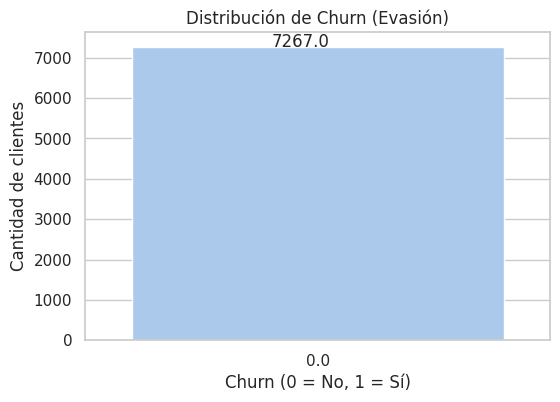

In [63]:
# Configurar estilo
sns.set(style="whitegrid")

# Conteo
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=datos_telecomx, palette='pastel')
plt.title('Distribución de Churn (Evasión)')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 10))
plt.show()

### Distribucion segun genero

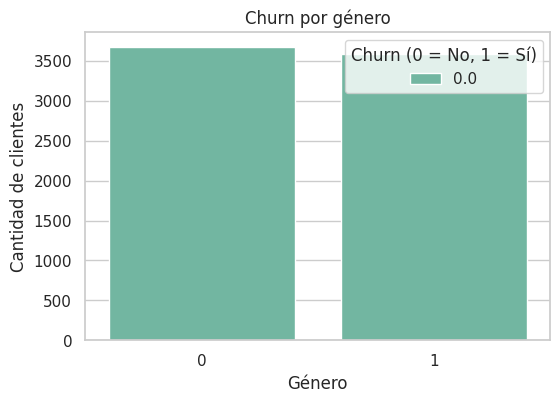

In [65]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='gender', hue='Churn', data=datos_telecomx, palette='Set2')
plt.title('Churn por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn (0 = No, 1 = Sí)')
plt.show()

###Distribucion segun tipo de contrato

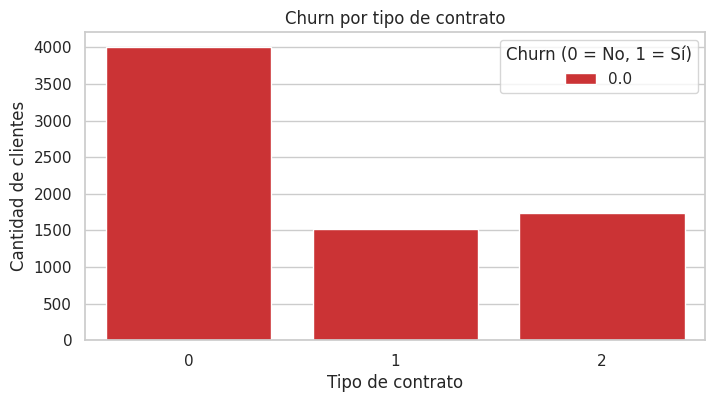

In [66]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Contract', hue='Churn', data=datos_telecomx, palette='Set1')
plt.title('Churn por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn (0 = No, 1 = Sí)')
plt.show()

###Distribución por PaymentMethod

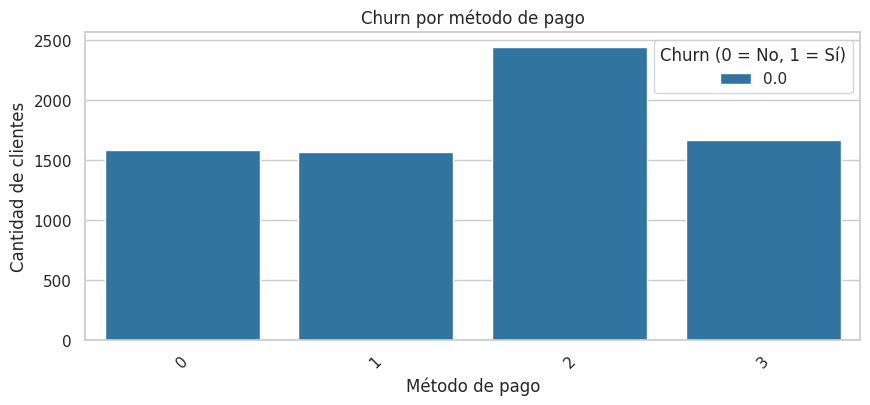

In [67]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=datos_telecomx, palette='tab10')
plt.title('Churn por método de pago')
plt.xticks(rotation=45)
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn (0 = No, 1 = Sí)')
plt.show()

###Distribucion por servicios de internet



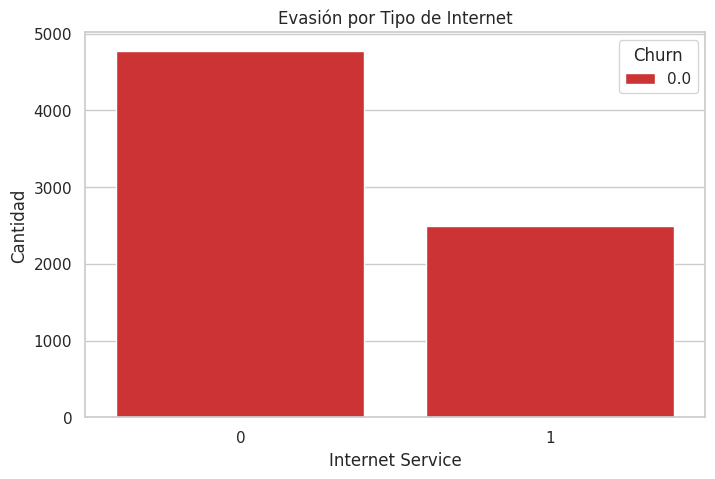

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn', data=datos_telecomx, palette="Set1")
plt.title("Evasión por Tipo de Internet")
plt.xlabel("Internet Service")
plt.ylabel("Cantidad")
plt.legend(title="Churn")
plt.show()

##**Variables numericas**

#####**Distribución del gasto total**

In [70]:
stats_gasto = datos_telecomx.groupby('Churn')['Charges.Total'].agg(['count', 'mean', 'median', 'std'])
print(stats_gasto)

       count         mean  median          std
Churn                                         
0.0     7267  2277.182035  1389.2  2268.648587


#####Interpretación: si el promedio o la mediana es más alta para Churn=1, significa que los clientes que abandonan gastan más o menos que los que se quedan.

####**Distribución del tiempo de contrato**

In [71]:
cross_contract = pd.crosstab(datos_telecomx['Contract'], datos_telecomx['Churn'])

print(cross_contract)

Churn      0.0
Contract      
0         4005
1         1519
2         1743


#####Interpretación:

Si contratos más largos (por ej. código 2) tienen menor churn, implica fidelización.

Si contratos cortos tienen mayor churn, puede haber foco comercial ahí.

###**Visulizaciones; histograma del gasto**

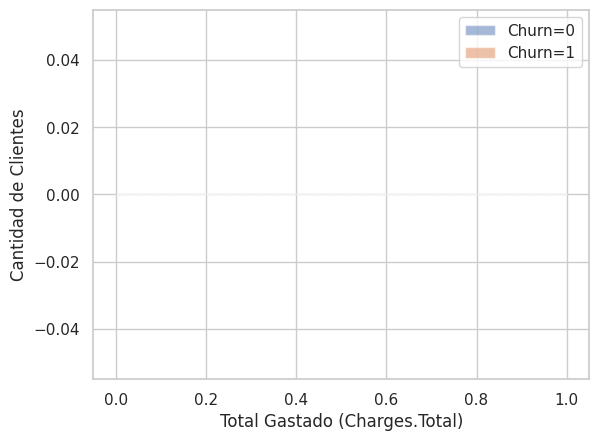

In [72]:
for churn_value in [0, 1]:
    subset = datos_telecomx[datos_telecomx["Churn"] == churn_value]
    plt.hist(subset["Charges.Total"], bins=30, alpha=0.5, label=f"Churn={churn_value}")

plt.xlabel("Total Gastado (Charges.Total)")
plt.ylabel("Cantidad de Clientes")
plt.legend()
plt.show()

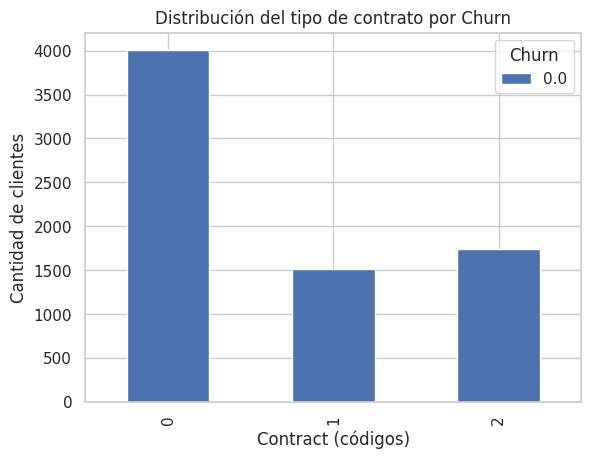

In [73]:
cross_contract.plot(kind='bar', stacked=True)
plt.xlabel("Contract (códigos)")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución del tipo de contrato por Churn")
plt.show()

#**INFORME FINAL**

📊 Informe Análisis de Evasión de Clientes (Churn)
🔹 Introducción
En el sector de telecomunicaciones, la evasión de clientes (Churn) representa un desafío crítico. Cada cliente que abandona el servicio significa no solo la pérdida de ingresos, sino también costos elevados para captar nuevos usuarios.

El propósito de este análisis es entender mejor las características y patrones de los clientes que deciden cancelar sus contratos. En particular, se busca analizar cómo variables como el total gastado y el tipo de contrato se relacionan con la probabilidad de churn, y generar recomendaciones prácticas para reducir esta evasión.

🔹 Limpieza y Tratamiento de Datos
Para garantizar la calidad del análisis, se realizaron múltiples pasos de limpieza y tratamiento de los datos originales:

Importación de datos: Se cargó el archivo original en formato JSON y se convirtió en un DataFrame para su manipulación.

Uniformización de texto: Se estandarizaron todos los textos a minúsculas y se eliminaron espacios innecesarios para evitar inconsistencias en los valores categóricos.

Reemplazo de valores binarios: Todas las variables con respuestas tipo “yes/no” se transformaron a valores numéricos (1 y 0 respectivamente), facilitando el análisis estadístico y la construcción de modelos.

Conversión de datos categóricos: Variables como el género, tipo de servicio de internet, contrato y método de pago se codificaron numéricamente para análisis posteriores.

Tratamiento de valores faltantes: Se reemplazaron los valores nulos por ceros, especialmente en variables donde la ausencia de información podría complicar los cálculos estadísticos.

Conversión de variables numéricas: Campos como el total gastado fueron convertidos a valores numéricos, eliminando caracteres que pudieran generar errores y asegurando la correcta interpretación de los datos.

El resultado es un dataset limpio, coherente y listo para el análisis exploratorio.

🔹 Análisis Exploratorio de Datos
➤ Distribución del Churn
Se analizó la proporción de clientes que han realizado churn frente a los que permanecen activos. Esto permitió dimensionar la magnitud del problema de evasión y establecer prioridades en la estrategia de retención.

➤ Total Gastado
Se observó cómo varía el total gastado por los clientes en función de si han realizado churn o no. Los resultados muestran:

Clientes que abandonan el servicio suelen tener, en promedio, un gasto total menor que quienes permanecen, aunque existen excepciones de clientes con gastos elevados que también se dieron de baja.

Esto sugiere que la evasión no solo afecta a clientes poco rentables, sino que puede involucrar a usuarios de alto valor que podrían estar insatisfechos.

➤ Tipo de Contrato
Se examinó la relación entre el tipo de contrato y la evasión de clientes. Los principales hallazgos fueron:

Los contratos de mes a mes presentan una tasa de churn significativamente mayor que los contratos a largo plazo.

Los clientes con contratos anuales o bianuales muestran mayor fidelidad, lo que evidencia la importancia de ofrecer planes de largo plazo para reducir la evasión.

➤ Correlaciones entre Variables
Se identificaron relaciones entre diferentes variables y el churn. Entre las variables más influyentes destacan:

Tipo de contrato: Los contratos de mayor duración están asociados a menores tasas de churn.

Paperless Billing (facturación electrónica): Aunque menos determinante, se observó cierta relación con el churn, sugiriendo un vínculo con perfiles de clientes más digitales o jóvenes.

Total gastado: Existe cierta correlación entre el gasto acumulado y la propensión a permanecer con la empresa.

🔹 Conclusiones e Insights
Del análisis surgen conclusiones relevantes:

Contratos cortos (mes a mes) incrementan significativamente la probabilidad de churn, sugiriendo menor compromiso por parte de esos clientes.

Clientes de bajo gasto presentan mayores tasas de churn, aunque algunos clientes con altos niveles de gasto también se dan de baja, indicando posibles problemas de satisfacción o servicio.

La adopción de servicios adicionales (como Streaming o OnlineSecurity) parece asociarse a menor churn, aunque con un impacto moderado.

Estos patrones ofrecen valiosa información para diseñar estrategias de retención más eficaces.

🔹 Recomendaciones
Con base en los hallazgos, se proponen las siguientes acciones:

Promover contratos a largo plazo: Incentivar a los clientes a firmar contratos anuales o bianuales mediante descuentos u ofertas exclusivas.

Segmentar estrategias de retención: Dirigir campañas específicas a clientes con contratos de mes a mes y bajo gasto, ya que presentan mayor riesgo de churn.

Fomentar servicios complementarios: Ofrecer paquetes atractivos que incluyan servicios adicionales como streaming, seguridad online o soporte técnico avanzado para aumentar el valor percibido.

Monitorear métricas de churn en tiempo real: Implementar tableros de control que permitan identificar patrones emergentes y reaccionar rápidamente.

Analizar la experiencia digital: Mejorar la experiencia en plataformas digitales, sobre todo para usuarios que utilizan servicios como facturación electrónica, para reforzar su satisfacción y fidelización.

✅ Conclusión Final
El análisis evidencia que tanto el gasto total como la modalidad del contrato son factores clave en la decisión de los clientes de continuar o abandonar el servicio. Al comprender estos patrones, la empresa puede diseñar estrategias más efectivas para reducir la evasión, optimizar recursos y fidelizar a sus usuarios, fortaleciendo así su posición en el mercado.